In [1]:
import matplotlib.pyplot as plt 
%matplotlib inline

import itertools

import pywt
import numpy as np
from scipy.misc import imread, imresize

In [2]:
# get_image will return a handle to the image itself, and a numpy array of its pixels to input the network
def get_image(path):
    return imread(path)

In [3]:
images_path = '../data/101_ObjectCategories'
example_images = [images_path + '/hedgehog/image_000{}.jpg'.format(i) for i in range(1,6)]

In [4]:
w = pywt.Wavelet('db3')

# Multistep DWT

We do 3-step DWT of grayscale image (averaged over color channels), with db3 wavelet

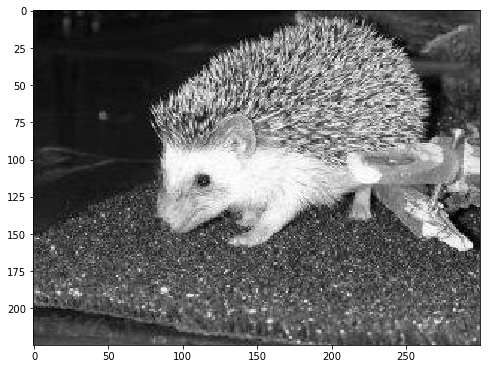

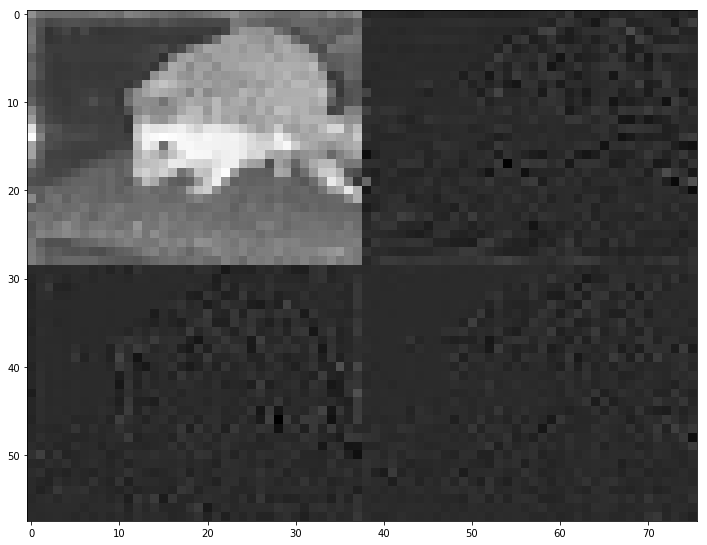

In [5]:
image_filename = example_images[0]
img_unnormalized = get_image(image_filename).sum(axis=2)
img = img_unnormalized / img_unnormalized.mean()
plt.figure(figsize=(8,8))

plt.imshow(img, cmap='gray')
plt.show()

wname = 'db3'

(cA, cD, __, __)  = pywt.wavedec2(
  img,
  wavelet=wname,
  mode='periodization',
  level=3)
imgs = [cA, cD]

plt.figure(figsize=(12,12))

r1 = np.hstack([cA, cD[0]])
r2 = np.hstack(cD[1:])
plt.imshow(np.vstack([r1, r2]), cmap='gray')
plt.show()

### Image reconstructed from thresholding by T

T is the value of N'th largest coefficient (N = 1000) 

Keeping 1000 largest coefficients


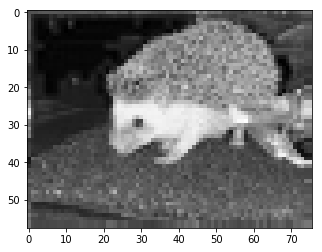

In [6]:
from heapq import nlargest
N = 1000 
T = nlargest(N, abs(cA.reshape(cA.shape[0] * cA.shape[1])))[-1]

img_thr = abs(cA) >= T 
(print(
  "Keeping {} largest coefficients"
    .format(np.count_nonzero(img_thr))))
truncated_img = cA * img_thr
restored_img = (pywt.idwt2(
                 (truncated_img, cD),
                  wname,
                  mode='periodization'))
plt.imshow(restored_img, cmap='gray')

In [7]:
print("Original image size:", img.shape, "({} pixels)".format(np.multiply(*img.shape)))

print("Reduced image size:", restored_img.shape, "({} pixels)".format(np.multiply(*restored_img.shape)))

print('Number of nonzero pixels in reduced image:', np.count_nonzero(truncated_img))

Original image size: (225, 300) (67500 pixels)
Reduced image size: (58, 76) (4408 pixels)
Number of nonzero pixels in reduced image: 1000
